✅ Dataset Loaded Successfully!
Shape: (1025, 12)
Unique values in target column: [0 1]


,cp,sex,exang,ca,thal,thalach,trestbps,chol,slope,age,oldpeak,target
0,-0.915755,0.661504,-0.712287,1.209221,1.089852,0.821321,-0.377636,-0.659332,0.995433,-0.268437,-0.060888,0
1,-0.915755,0.661504,1.403928,-0.731971,1.089852,0.255968,0.479107,-0.833861,-2.243675,-0.158157,1.727137,0
2,-0.915755,0.661504,1.403928,-0.731971,1.089852,-1.048692,0.764688,-1.396233,-2.243675,1.716595,1.301417,0
3,-0.915755,0.661504,-0.712287,0.238625,1.089852,0.516900,0.936037,-0.833861,0.995433,0.724079,-0.912329,0
4,-0.915755,-1.511706,-0.712287,2.179817,-0.522122,-1.874977,0.364875,0.930822,-0.624121,0.834359,0.705408,0


✅ Dataset Loaded Successfully!
Shape: (1025, 12)


,cp,sex,exang,ca,thal,thalach,trestbps,chol,slope,age,oldpeak,target
0,-0.915755,0.661504,-0.712287,1.209221,1.089852,0.821321,-0.377636,-0.659332,0.995433,-0.268437,-0.060888,0
1,-0.915755,0.661504,1.403928,-0.731971,1.089852,0.255968,0.479107,-0.833861,-2.243675,-0.158157,1.727137,0
2,-0.915755,0.661504,1.403928,-0.731971,1.089852,-1.048692,0.764688,-1.396233,-2.243675,1.716595,1.301417,0
3,-0.915755,0.661504,-0.712287,0.238625,1.089852,0.516900,0.936037,-0.833861,0.995433,0.724079,-0.912329,0
4,-0.915755,-1.511706,-0.712287,2.179817,-0.522122,-1.874977,0.364875,0.930822,-0.624121,0.834359,0.705408,0


Unique target values after conversion: [0 1]
Features shape: (1025, 11)
Target shape: (1025,)
Features shape: (1025, 11)
Target shape: (1025,)
Training Set: (820, 11)
Testing Set: (205, 11)

🔹 Logistic Regression Results:
Accuracy  : 0.8244
Precision : 0.7805
Recall    : 0.9143
F1 Score  : 0.8421
AUC Score : 0.9272

🔹 Decision Tree Results:
Accuracy  : 0.9854
Precision : 1.0000
Recall    : 0.9714
F1 Score  : 0.9855
AUC Score : 0.9857

🔹 Random Forest Results:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
AUC Score : 1.0000

🔹 SVM Results:
Accuracy  : 0.9122
Precision : 0.8850
Recall    : 0.9524
F1 Score  : 0.9174
AUC Score : 0.9719


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.824390,0.780488,0.914286,0.842105,0.927238
1,Decision Tree,0.985366,1.000000,0.971429,0.985507,0.985714
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
3,SVM,0.912195,0.884956,0.952381,0.917431,0.971905


C:\Users\Linda\AppData\Local\Temp\ipykernel_2512\2261228144.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")


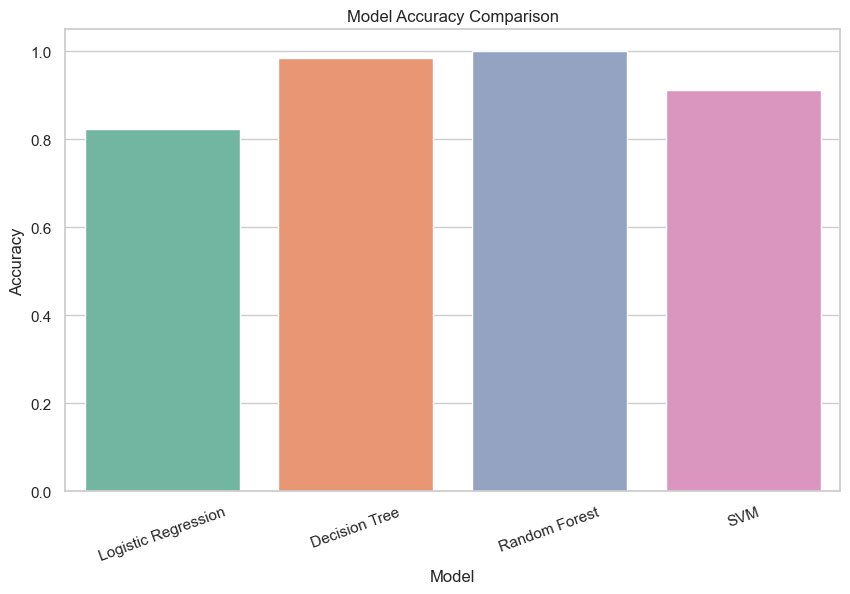

C:\Users\Linda\AppData\Local\Temp\ipykernel_2512\2261228144.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="coolwarm")


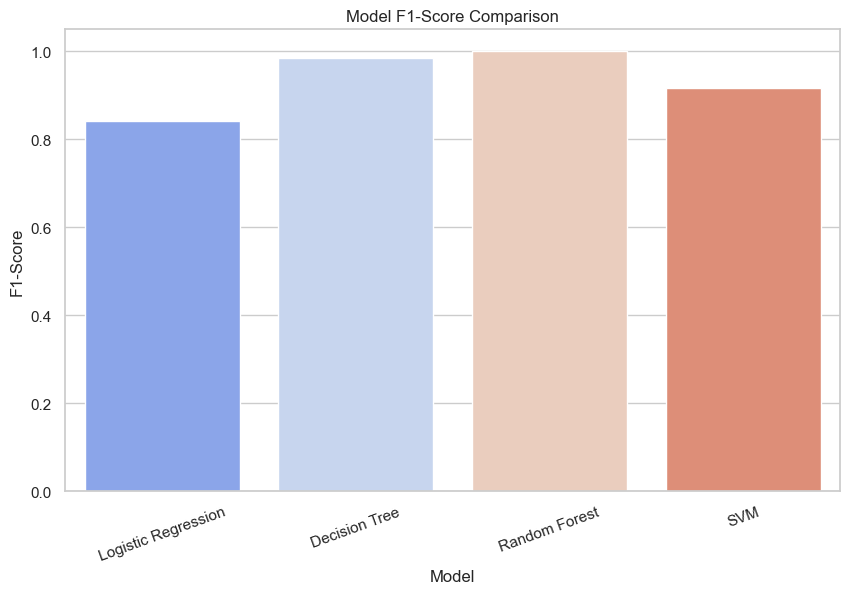

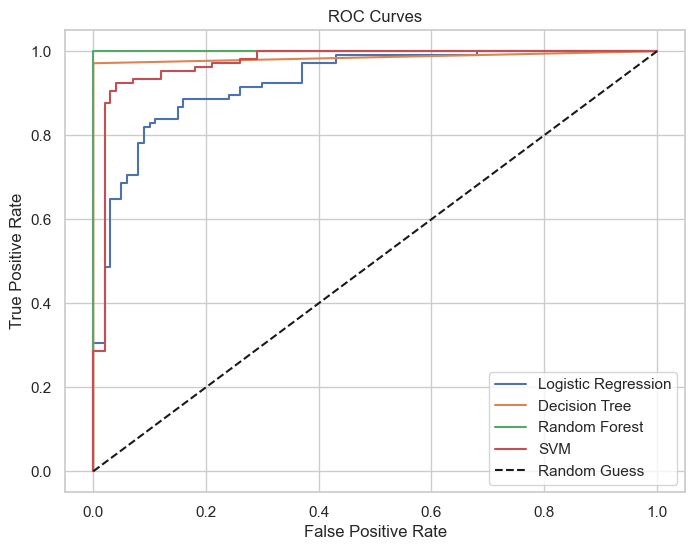


✅ Best Model 'Random Forest' saved as 'best_model.pkl'


In [1]:
# =====================================
# STEP 1: IMPORT LIBRARIES
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# =====================================
# STEP 2: LOAD REDUCED DATASET
df = pd.read_csv("heart_selected_features.csv")
#new code
# STEP 2: LOAD REDUCED DATASET
df = pd.read_csv("heart_selected_features.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)

# 🔹 FIX: Force target to be binary integers (0 or 1)
if 'target' in df.columns:
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0).astype(int)

print("Unique values in target column:", df["target"].unique())
display(df.head())

#end of new code
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# =====================================
# STEP 3: SPLIT FEATURES & TARGET
# =====================================
# STEP 3: SPLIT FEATURES & TARGET
if 'target' in df.columns:
    X = df.drop("target", axis=1)
    y = df["target"]
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

# 🔹 FIX: Convert multi-class target into binary labels (0 = No Disease, 1 = Disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

print("Unique target values after conversion:", y.unique())
print("Features shape:", X.shape)
print("Target shape:", y.shape)




if 'target' in df.columns:
    X = df.drop("target", axis=1)
    y = df["target"]
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# =====================================
# STEP 4: SPLIT INTO TRAIN & TEST SETS
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

# =====================================
# STEP 5: INITIALIZE MODELS
# =====================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# =====================================
# STEP 6: TRAIN & EVALUATE MODELS
# =====================================
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append([model_name, accuracy, precision, recall, f1, auc])

    # Print individual results
    print(f"\n🔹 {model_name} Results:")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    if auc is not None:
        print(f"AUC Score : {auc:.4f}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
display(results_df)

# =====================================
# STEP 7: VISUALIZE MODEL PERFORMANCE
# =====================================
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="coolwarm")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=20)
plt.show()

# =====================================
# STEP 8: PLOT ROC CURVES
# =====================================
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name}")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# =====================================
# STEP 9: SAVE BEST MODEL (OPTIONAL)
# =====================================
from joblib import dump

# Choose the best model based on F1-score
best_model_name = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

dump(best_model, "best_model.pkl")
print(f"\n✅ Best Model '{best_model_name}' saved as 'best_model.pkl'")
